in_img


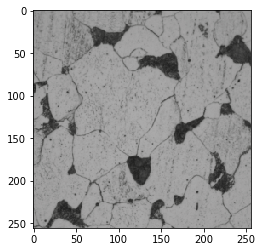

la_img


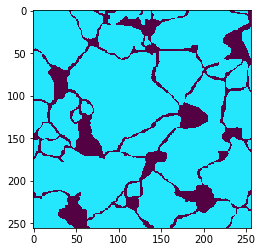

pr_img


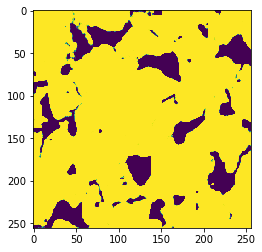

In [1]:
import cv2
import matplotlib.pyplot as plt

in_img = cv2.imread("../tmp/Input_Image_No_1.png")
la_img = cv2.imread("../tmp/Label_Mask_No_1.png")
pr_img = cv2.imread("../tmp/Predicted_Mask_No_1.png", 2)

print("in_img")
plt.imshow(in_img)
plt.show()

print("la_img")
plt.imshow(la_img)
plt.show()

print("pr_img")
plt.imshow(pr_img)
plt.show()

full_image_S25C


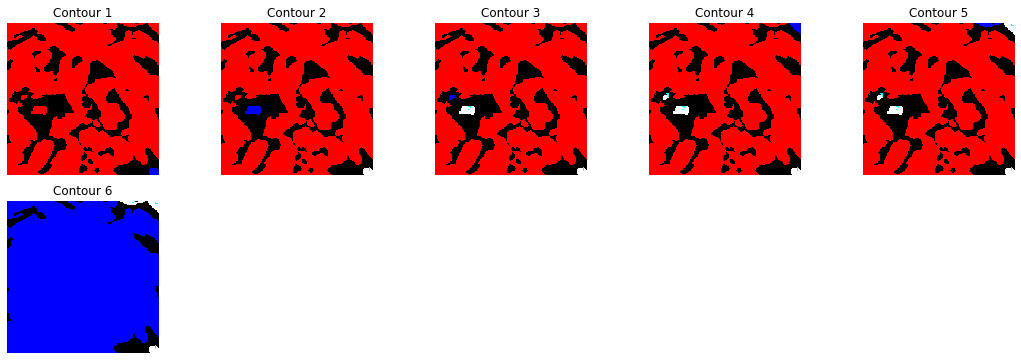

組織の個数: 27
各組織の周の長さ: [47.899494647979736, 76.04163014888763, 27.899494647979736, 64.6274163722992, 87.21320295333862, 1566.63159096241, 35.2132031917572, 51.69848418235779, 34.97056233882904, 41.21320295333862, 86.91168689727783, 50.87005698680878, 5.656854152679443, 10.485281229019165, 39.21320283412933, 5.656854152679443, 5.656854152679443, 7.656854152679443, 16.485281229019165, 745.8376536369324, 33.79898929595947, 908.3056910037994, 67.35533905029297, 49.11269772052765, 188.16652047634125, 18.485281229019165, 5.656854152679443]
各組織の面積: [152.5, 313.5, 48.5, 190.0, 132.5, 59093.0, 77.5, 167.5, 78.0, 100.5, 278.0, 103.5, 2.0, 7.0, 68.5, 2.0, 2.0, 4.0, 15.0, 6297.0, 59.0, 4342.5, 260.5, 109.0, 1026.0, 18.0, 2.0]
組織の面積(合計): 72949.5


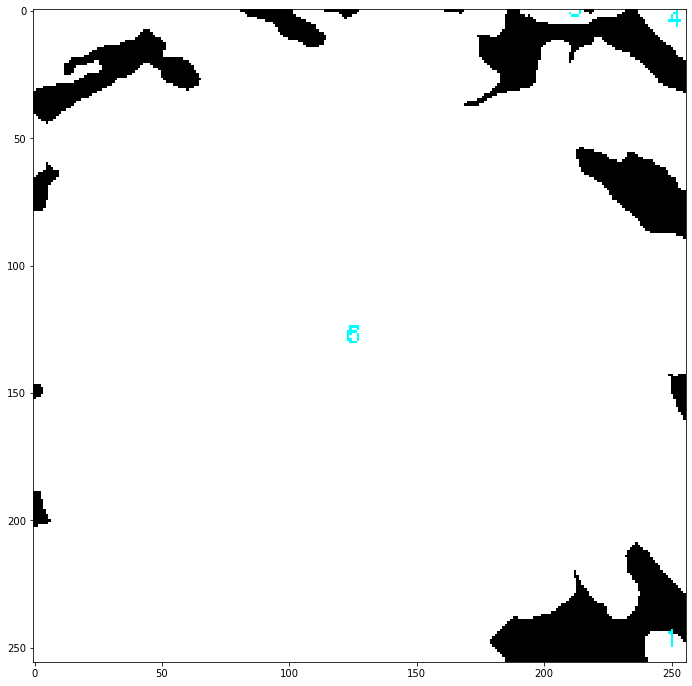

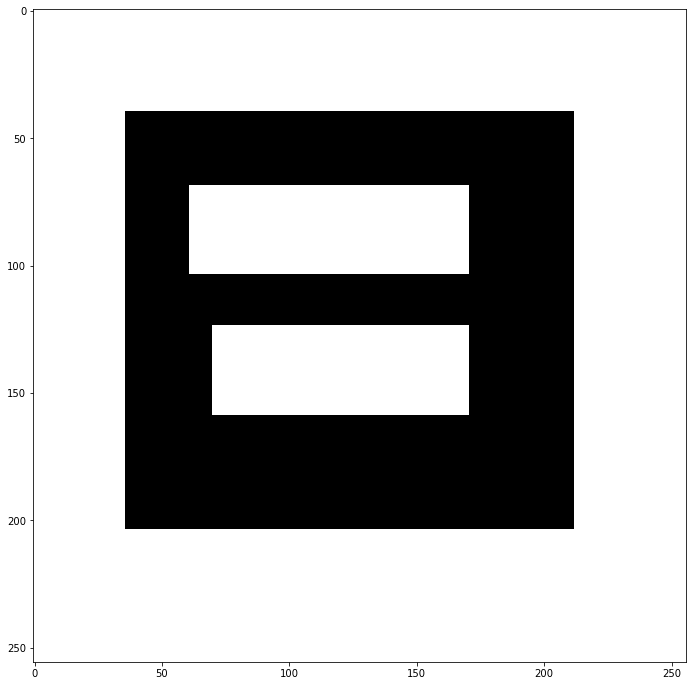

contours
[array([[[ 70, 124]],

       [[ 70, 158]],

       [[170, 158]],

       [[170, 124]]], dtype=int32), array([[[ 61,  69]],

       [[ 61, 103]],

       [[170, 103]],

       [[170,  69]]], dtype=int32), array([[[  0,   0]],

       [[  0, 255]],

       [[255, 255]],

       [[255,   0]]], dtype=int32), array([[[ 35,  40]],

       [[ 36,  39]],

       [[211,  39]],

       [[212,  40]],

       [[212, 203]],

       [[211, 204]],

       [[ 36, 204]],

       [[ 35, 203]]], dtype=int32)]
hierarchy
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1  3 -1]
  [-1 -1 -1  2]]]


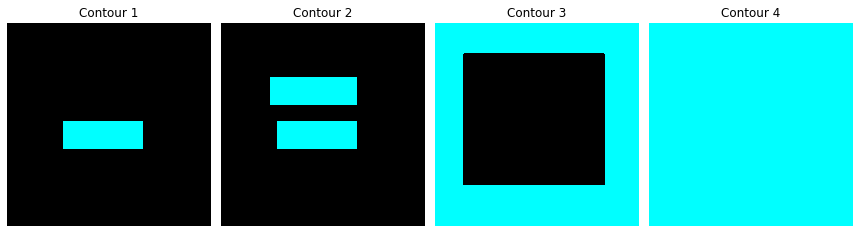

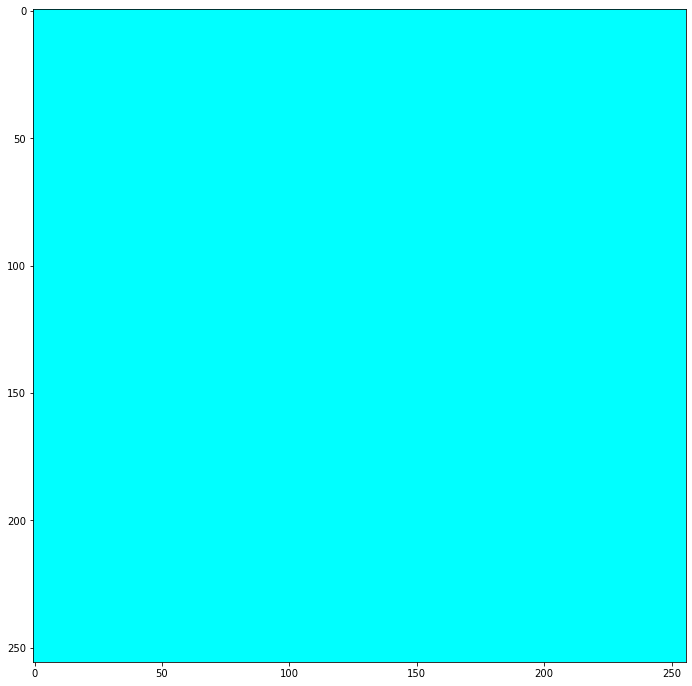

Total Area: 72131.0


In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# フェライトの解析
def exec_ferrite_analysis(ferrite_image):
    gray_ferrite_image = cv2.cvtColor(ferrite_image, cv2.COLOR_BGR2GRAY)

    # 二値化処理を行う
    _, binary_image = cv2.threshold(gray_ferrite_image, 128, 255, cv2.THRESH_BINARY)
    # 輪郭を検出
    contours, _ = cv2.findContours(
        binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    contours, hierarchy = cv2.findContours(
        binary_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE
    )
    # 輪郭の個数
    contour_count = len(contours)

    # 各輪郭の周の長さと面積を取得
    contour_lengths = [cv2.arcLength(contour, closed=True) for contour in contours]
    contour_areas = [cv2.contourArea(contour) for contour in contours]

    # 結果を描画
    result_image = np.zeros_like(ferrite_image)
    cv2.drawContours(result_image, contours, -1, 255, thickness=cv2.FILLED)

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.3
    font_color = (0, 255, 255)  # 青色
    font_thickness = 1

    num_columns = 5
    num_rows = (contour_count + num_columns - 1) // num_columns

    # plt.figure(figsize=(10, 10))
    plt.figure(figsize=(15, 15))

    for i, (contour, hier) in enumerate(zip(contours, hierarchy[0])):
        # 階層情報を使用して、外側の輪郭のみ描画
        if hier[3] == -1:
            # 輪郭の中心座標を計算
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
            else:
                cX, cY = 0, 0

            # 各輪郭を描画（青で塗りつぶす）
            cv2.drawContours(
                result_image, [contour], -1, (0, 0, 255), thickness=cv2.FILLED
            )

            # 1列に5枚表示
            plt.subplot(num_rows, num_columns, i + 1)
            plt.imshow(result_image)
            plt.axis("off")
            plt.title(f"Contour {i+1}")

            # 各輪郭を描画（白色で塗りつぶす）
            cv2.drawContours(
                result_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED
            )
            # 番号を輪郭の中心に配置
            cv2.putText(
                result_image,
                str(i + 1),
                (cX, cY),
                font,
                font_scale,
                font_color,
                font_thickness,
            )

    # for i, contour in enumerate(contours):
    #     # 輪郭の中心座標を計算
    #     M = cv2.moments(contour)
    #     if M["m00"] != 0:
    #         cX = int(M["m10"] / M["m00"])
    #         cY = int(M["m01"] / M["m00"])
    #     else:
    #         cX, cY = 0, 0

    #     # 各輪郭を描画（青で塗りつぶす）
    #     cv2.drawContours(result_image, [contour], -1, (0, 0, 255), thickness=cv2.FILLED)

    #     # 1列に5枚表示
    #     plt.subplot(num_rows, num_columns, i + 1)
    #     plt.imshow(result_image)
    #     plt.axis('off')
    #     plt.title(f'Contour {i+1}')

    #     # 各輪郭を描画（白色で塗りつぶす）
    #     cv2.drawContours(result_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
    #     # 番号を輪郭の中心に配置
    #     cv2.putText(result_image, str(i+1), (cX, cY), font, font_scale, font_color, font_thickness)

    plt.tight_layout()
    plt.show()

    sum_areas = 0
    for area in contour_areas:
        sum_areas += area

    print(f"組織の個数: {contour_count}")
    print(f"各組織の周の長さ: {contour_lengths}")
    print(f"各組織の面積: {contour_areas}")
    print(f"組織の面積(合計): {sum_areas}")

    plt.figure(figsize=(12, 12))
    plt.imshow(result_image)
    plt.show()


# row_image = cv2.imread('../tmp/Input_Image_No_1.png')で取得したものを使用
def display_input_label_pre_image(input, label, predicted, name):
    gray_label = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
    gray_predicted = cv2.cvtColor(predicted, cv2.COLOR_BGR2GRAY)

    figure, ax = plt.subplots(ncols=3, figsize=(15, 18))

    ax[0].imshow(input)
    ax[1].imshow(gray_label, interpolation="nearest", cmap="gray")
    ax[2].imshow(gray_predicted, interpolation="nearest", cmap="gray")
    ax[0].set_title(f"Input Image {name}")
    ax[1].set_title(f"Label Mask {name}")
    ax[2].set_title(f"Predicted Mask {name}")
    ax[0].set_axis_off()
    ax[1].set_axis_off()
    ax[2].set_axis_off()

    plt.tight_layout()
    plt.show()


# full image
print("full_image_S25C")
full_image_input_S25C = cv2.imread(
    "../../tmp/img_rough/202312161957/Input_Image_No_21.png"
)
full_image_label_S25C = cv2.imread(
    "../../tmp/img_rough/202312161957/Label_Mask_No_21.png"
)
full_image_predicted_S25C = cv2.imread(
    "../../tmp/img_rough/202312161957/Predicted_Mask_No_21.png"
)
# display_input_label_pre_image(full_image_input_S25C, full_image_label_S25C, full_image_predicted_S25C, 'S25C No.1')
exec_ferrite_analysis(full_image_predicted_S25C)


def exec_ferrite_analysis2(ferrite_image):
    gray_ferrite_image = cv2.cvtColor(ferrite_image, cv2.COLOR_BGR2GRAY)

    # 二値化処理を行う
    _, binary_image = cv2.threshold(gray_ferrite_image, 128, 255, cv2.THRESH_BINARY)
    # 輪郭と階層情報を検出
    contours, hierarchy = cv2.findContours(
        binary_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE
    )

    # 輪郭の個数
    contour_count = len(contours)

    # 各輪郭の周の長さと面積を取得
    contour_lengths = [cv2.arcLength(contour, closed=True) for contour in contours]
    contour_areas = [cv2.contourArea(contour) for contour in contours]

    # 結果を描画
    result_image = np.zeros_like(ferrite_image)
    cv2.drawContours(result_image, contours, -1, 255, thickness=cv2.FILLED)

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.3
    font_color = (0, 255, 255)  # 青色
    font_thickness = 1

    num_columns = 5
    num_rows = (contour_count + num_columns - 1) // num_columns

    plt.figure(figsize=(15, 15))

    result_image = np.zeros_like(ferrite_image)
    # for i, (contour, hier) in enumerate(zip(contours, hierarchy[0])):
    for i, contour in enumerate(contours):
        # 輪郭の中心座標を計算
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        # # 外側の輪郭を青で塗りつぶし、内側の輪郭を黒で塗りつぶす
        #   if hier[3] == -1:
        #       cv2.drawContours(result_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
        #   else:
        #       cv2.drawContours(result_image, [contour], -1, (0, 0, 255), thickness=cv2.FILLED)

        #   plt.subplot(num_rows, num_columns, i + 1)
        #   plt.imshow(result_image)
        #   plt.axis('off')
        #   plt.title(f'Contour {i+1}')

        #   # 外側の輪郭を白で塗りつぶし、内側の輪郭を黒で塗りつぶす
        #   if hier[3] == -1:
        #       cv2.drawContours(result_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
        #   else:
        #       cv2.drawContours(result_image, [contour], -1, (0, 0, 0), thickness=cv2.FILLED)

        #   cv2.putText(result_image, str(i+1), (cX, cY), font, font_scale, font_color, font_thickness)

        # 外側の輪郭を青で塗りつぶす
        cv2.drawContours(result_image, [contour], -1, (255, 0, 0), thickness=cv2.FILLED)

        # 内側の輪郭が存在する場合
        if hierarchy[0][i][2] != -1:
            inner_contour = contours[hierarchy[0][i][2]]

            # 内側の輪郭を黒で塗りつぶす
            cv2.drawContours(
                result_image, [inner_contour], -1, (0, 0, 0), thickness=cv2.FILLED
            )

        # 白で外側の輪郭を塗りつぶす
        cv2.drawContours(
            result_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED
        )

        # 内側の輪郭が存在する場合
        if hierarchy[0][i][2] != -1:
            inner_contour = contours[hierarchy[0][i][2]]

            # 内側の輪郭を黒で塗りつぶす
            cv2.drawContours(
                result_image, [inner_contour], -1, (0, 0, 0), thickness=cv2.FILLED
            )

            # 面積から内側の輪郭の面積を引く
            contour_areas[i] -= cv2.contourArea(inner_contour)

        # 番号を輪郭の中心に配置
        cv2.putText(
            result_image,
            str(i + 1),
            (cX, cY),
            font,
            font_scale,
            font_color,
            font_thickness,
        )

        # 表示
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(result_image)
        plt.axis("off")
        plt.title(f"Contour {i + 1}")

    plt.tight_layout()
    plt.show()

    sum_areas = 0
    for i in range(contour_count):
        # 内側の輪郭があれば、その分を面積から削除
        if hierarchy[0][i][3] != -1:
            contour_areas[hierarchy[0][i][3]] -= contour_areas[i]

        sum_areas += contour_areas[i]

    # sum_areas = 0
    # for area in contour_areas:
    #     sum_areas += area

    print(f"輪郭の個数: {contour_count}")
    print(f"各輪郭の周の長さ: {contour_lengths}")
    print(f"各輪郭の面積: {contour_areas}")
    print(f"各輪郭の面積(合計): {sum_areas}")

    plt.figure(figsize=(12, 12))
    plt.imshow(result_image)
    plt.show()


def exec_ferrite_analysis2(ferrite_image):
    gray_ferrite_image = cv2.cvtColor(ferrite_image, cv2.COLOR_BGR2GRAY)

    # 二値化処理を行う
    _, binary_image = cv2.threshold(gray_ferrite_image, 128, 255, cv2.THRESH_BINARY)
    # 輪郭を検出
    contours, hierarchy = cv2.findContours(
        binary_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE
    )

    # print('contours')
    # print(contours)

    # print('hierarchy')
    # print(hierarchy)

    # 結果を描画
    result_image = np.zeros_like(ferrite_image)

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.3
    font_color = (0, 255, 255)  # 青色
    font_thickness = 1

    num_columns = 5
    num_rows = (len(contours) + num_columns - 1) // num_columns

    # 各輪郭の面積を格納するリスト
    contour_areas = []

    plt.figure(figsize=(15, 15))

    for i, contour in enumerate(contours):
        # 輪郭の中心座標を計算
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        # 外側の輪郭を青で塗りつぶす
        cv2.drawContours(result_image, [contour], -1, (255, 0, 0), thickness=cv2.FILLED)

        # 内側の輪郭が存在する場合
        if hierarchy[0][i][2] != -1:
            inner_contour = contours[hierarchy[0][i][2]]

            # 内側の輪郭を黒で塗りつぶす
            cv2.drawContours(
                result_image, [inner_contour], -1, (0, 0, 0), thickness=cv2.FILLED
            )

            # 面積から内側の輪郭の面積を引く
            contour_areas.append(
                cv2.contourArea(contour) - cv2.contourArea(inner_contour)
            )
        else:
            # 内側の輪郭が存在しない場合は外側の輪郭の面積をそのまま追加
            contour_areas.append(cv2.contourArea(contour))

        # 表示
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(result_image)
        plt.axis("off")
        plt.title(f"Contour {i + 1}")

        # 白で外側の輪郭を塗りつぶす
        cv2.drawContours(
            result_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED
        )

        # 内側の輪郭が存在する場合
        if hierarchy[0][i][2] != -1:
            inner_contour = contours[hierarchy[0][i][2]]

            # 内側の輪郭を黒で塗りつぶす
            cv2.drawContours(
                result_image, [inner_contour], -1, (0, 0, 0), thickness=cv2.FILLED
            )

        # 番号を輪郭の中心に配置
        cv2.putText(
            result_image,
            str(i + 1),
            (cX, cY),
            font,
            font_scale,
            font_color,
            font_thickness,
        )

    plt.tight_layout()
    plt.show()

    sum_areas = sum(contour_areas)

    print(f"輪郭の個数: {len(contours)}")
    print(
        f"各輪郭の周の長さ: {[cv2.arcLength(contour, closed=True) for contour in contours]}"
    )
    print(f"各輪郭の面積: {contour_areas}")
    print(f"各輪郭の面積(合計): {sum_areas}")

    plt.figure(figsize=(12, 12))
    plt.imshow(result_image)
    plt.show()


import cv2
import numpy as np


def exec_doughnut_analysis2(ferrite_image):
    # グレースケールに変換
    gray_ferrite_image = cv2.cvtColor(ferrite_image, cv2.COLOR_BGR2GRAY)

    # 二値化処理を行う
    _, binary_image = cv2.threshold(gray_ferrite_image, 128, 255, cv2.THRESH_BINARY)

    # 輪郭を検出
    contours, hierarchy = cv2.findContours(
        binary_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE
    )

    # 結果を描画
    result_image = np.zeros_like(ferrite_image)

    print("contours")
    print(contours)
    print("hierarchy")
    print(hierarchy)

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.3
    font_color = (0, 255, 255)  # 青色
    font_thickness = 1

    num_columns = 5
    num_rows = (len(contours) + num_columns - 1) // num_columns

    plt.figure(figsize=(15, 15))

    # 各ドーナツの面積を計算して青色で外側を塗りつぶす
    # 各ドーナツの面積を計算して青色で外側を塗りつぶす
    total_area = 0
    for i, contour in enumerate(contours):
        # 面積を計算
        area = cv2.contourArea(contour)

        # 内側の輪郭が存在するか確認
        inner_contour_index = hierarchy[0, i, 2]
        if inner_contour_index != -1:
            inner_contour = contours[inner_contour_index]
            inner_area = cv2.contourArea(inner_contour)
            area -= inner_area

            # 外側から内側を引いた領域を塗りつぶす
            cv2.drawContours(
                result_image, [contour], -1, (0, 255, 255), thickness=cv2.FILLED
            )
            cv2.drawContours(
                result_image, [inner_contour], -1, (0, 0, 0), thickness=cv2.FILLED
            )
        else:
            # 内側の輪郭が存在しない場合は白で塗りつぶす
            cv2.drawContours(
                result_image, [contour], -1, (0, 255, 255), thickness=cv2.FILLED
            )

        total_area += area

        # 表示
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(result_image)
        plt.axis("off")
        plt.title(f"Contour {i + 1}")

        # テキストを追加
        M = cv2.moments(contour)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.putText(
            result_image,
            str(i + 1),
            (cX, cY),
            font,
            font_scale,
            font_color,
            font_thickness,
        )

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 12))
    plt.imshow(result_image)
    plt.show()

    # 合計の面積を表示
    print(f"Total Area: {total_area}")


# 画像のパスを指定して実行
# image_path = 'path/to/your/image.jpg'
dummy = cv2.imread("../../tmp/dummy.png")
plt.figure(figsize=(12, 12))
plt.imshow(dummy)
plt.show()
exec_doughnut_analysis2(dummy)


# exec_ferrite_analysis2(full_image_predicted_S25C)